In [1]:
%pip show radcad

Name: radcad
Version: 0.12.0
Summary: A Python package for dynamical systems modelling & simulation, inspired by and compatible with cadCAD
Home-page: 
Author: CADLabs
Author-email: benschza@users.noreply.github.com
License: 
Location: /Users/anthonykatwan/Desktop/QTM Interface/.venv/lib/python3.9/site-packages
Requires: pandas, pathos
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependences
import pandas as pd
import numpy as np

# radCAD
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend



In [3]:
import state_variables
import state_update_blocks
import sys_params
from processing import *

import importlib
importlib.reload(state_variables)
importlib.reload(state_update_blocks)
importlib.reload(sys_params)


<module 'sys_params' from '/Users/anthonykatwan/Desktop/QTM Interface/Model/sys_params.py'>

In [4]:

import traceback


MONTE_CARLO_RUNS = 1
TIMESTEPS = 30

model = Model(initial_state=state_variables.initial_state, params=sys_params.sys_param, state_update_blocks=state_update_blocks.state_update_block)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=MONTE_CARLO_RUNS)

result = simulation.run()
df = pd.DataFrame(result)


In [5]:

df.head()

#df.token_economy

,investors,token_economy,simulation,subset,run,substep,timestep
0,"{'Investor 1': {'percentage_allocation': 0.2, ...","{'initial_token_supply': 1000000, 'current_cir...",0,0,1,0,0
1,"{'Investor 1': {'percentage_allocation': 0.2, ...","{'initial_token_supply': 1000000, 'current_cir...",0,0,1,1,1
2,"{'Investor 1': {'percentage_allocation': 0.2, ...","{'initial_token_supply': 1000000, 'current_cir...",0,0,1,1,2
3,"{'Investor 1': {'percentage_allocation': 0.2, ...","{'initial_token_supply': 1000000, 'current_cir...",0,0,1,1,3
4,"{'Investor 1': {'percentage_allocation': 0.2, ...","{'initial_token_supply': 1000000, 'current_cir...",0,0,1,1,4


In [6]:


investor_df = extract_investors(df)

investor_df

,Investor_Name,current_allocation,timestep
0,Investor 1,50000.0,0
1,Investor 2,30000.0,0
2,Investor 3,250000.0,0
3,Investor 1,50000.0,1
4,Investor 2,30000.0,1
...,...,...,...
88,Investor 2,300000.0,29
89,Investor 3,500000.0,29
90,Investor 1,200000.0,30
91,Investor 2,300000.0,30


/var/folders/1t/5t776sq96779p785bgzmh9h40000gn/T/ipykernel_52361/2193997174.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pivot = df.pivot(index='timestep', columns='Investor_Name', values='current_allocation')


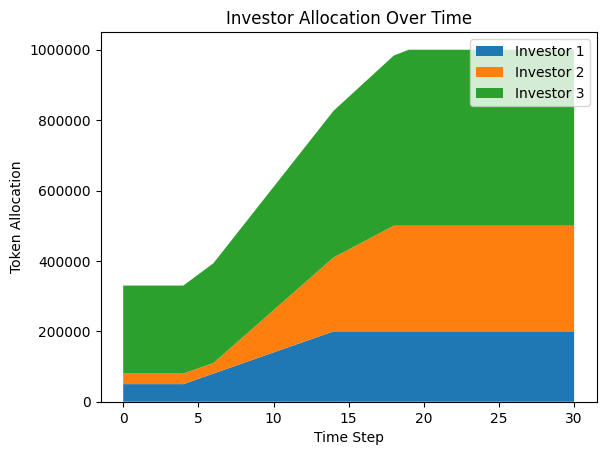

In [19]:



    
plot_stacked_area_graph(investor_df)
